Image 1
Line 1-2 distance:	 173.0
Line 2-3 distance:	 168.0 

Image 2
Line 1-2 distance:	 172.0
Line 2-3 distance:	 167.0 

Image 3
Line 1-2 distance:	 172.0
Line 2-3 distance:	 167.0 

Image 4
Line 1-2 distance:	 172.0
Line 2-3 distance:	 168.0 

Image 5
Line 1-2 distance:	 172.0
Line 2-3 distance:	 169.0 

Image 6
Line 1-2 distance:	 172.0
Line 2-3 distance:	 168.0 

Image 7
Line 1-2 distance:	 172.0
Line 2-3 distance:	 168.0 

Image 8
Line 1-2 distance:	 172.0
Line 2-3 distance:	 167.0 

Image 9
Line 1-2 distance:	 172.0
Line 2-3 distance:	 167.0 

Image 10
Line 1-2 distance:	 172.0
Line 2-3 distance:	 168.0 

Image 11
Line 1-2 distance:	 172.0
Line 2-3 distance:	 168.0 

Image 12
Line 1-2 distance:	 172.0
Line 2-3 distance:	 168.0 



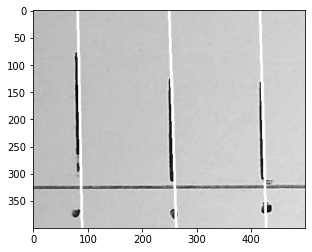

In [2]:
import cv2
import numpy as np
from libs.line_detector_all import LineDetectorAll
from libs import Rectangle, Scene
from libs import draw_rectangle_1, draw_line_1
from IPython.display import display, clear_output, Image
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Balao


for num_img in range(12):
    num_img += 1
    path = f"media/imagens_medicao/img ({num_img}).png"
    img = cv2.imread(path)
    img_gray = img[400:800, 350:850].copy()
    img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.bilateralFilter(img_gray, 5, 20, 20)

    sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=9)

    opening = np.sqrt(sobel_y**2)
    opening = (np.mean(opening, axis = 0)) - np.min(np.mean(opening, axis = 0))

    rois = []
    n_cont = 0
    save_it = 0
    pause_cont = 0

    for i in opening:
        if i > np.mean(opening):
            if pause_cont <= 0:
                save_it = 1

        if save_it:
            rois.append(n_cont)
            pause_cont = 100
            save_it = 0

        n_cont += 1
        pause_cont -= 1


    rect_1 = Rectangle(x = rois[0]-20, y = int(img_gray.shape[0]/4), rz = 0, w = 100, h = 100)
    rect_2 = Rectangle(x = rois[1]-20, y = int(img_gray.shape[0]/3), rz = 0, w = 100, h = 100)
    rect_3 = Rectangle(x = rois[2]-20, y = int(img_gray.shape[0]/3), rz = 0, w = 100, h = 100)

    roi_1 = rect_1.crop_from_img(img_gray)
    roi_2 = rect_2.crop_from_img(img_gray)
    roi_3 = rect_3.crop_from_img(img_gray)

    l_Detector_1  = LineDetectorAll(9, True, False, True)
    l_Detector_2  = LineDetectorAll(9, True, False, True)
    l_Detector_3  = LineDetectorAll(9, True, False, True)

    line_1 = l_Detector_1.detect(roi_1)
    line_2 = l_Detector_2.detect(roi_2)
    line_3 = l_Detector_3.detect(roi_3)

    # Scenes
    scene_1 = Scene()
    scene_1.add(rect_1, "rect_1", None)
    scene_1.add(rect_2, "rect_2", None)
    scene_1.add(rect_3, "rect_3", None)
    scene_1.add(line_1, "line_1", "rect_1")
    scene_1.add(line_2, "line_2", "rect_2")
    scene_1.add(line_3, "line_3", "rect_3")

    # Global lines
    line_1_global = scene_1.get_global("line_1")
    line_2_global = scene_1.get_global("line_2")
    line_3_global = scene_1.get_global("line_3")

    img_lines = img_gray.copy()
    draw_line_1(img_lines, line_1_global, color=255, linewidth=4, transparency=0.0)
    draw_line_1(img_lines, line_2_global, color=255, linewidth=4, transparency=0.0)
    draw_line_1(img_lines, line_3_global, color=255, linewidth=4, transparency=0.0)

    print(f"Image {num_img}")
    print("Line 1-2 distance:\t", line_2_global[0] - line_1_global[0])
    print("Line 2-3 distance:\t", line_3_global[0] - line_2_global[0], "\n")

    plt.imshow(img_lines, cmap = 'gray');
    time.sleep(1)

Image 1
Line 1-2 distance:	 173.0
Line 2-3 distance:	 168.0 

Image 2
Line 1-2 distance:	 172.0
Line 2-3 distance:	 167.0 

Image 3
Line 1-2 distance:	 172.0
Line 2-3 distance:	 167.0 

Image 4
Line 1-2 distance:	 172.0
Line 2-3 distance:	 168.0 

Image 5
Line 1-2 distance:	 172.0
Line 2-3 distance:	 169.0 

Image 6
Line 1-2 distance:	 172.0
Line 2-3 distance:	 168.0 

Image 7
Line 1-2 distance:	 172.0
Line 2-3 distance:	 168.0 

Image 8
Line 1-2 distance:	 172.0
Line 2-3 distance:	 167.0 

Image 9
Line 1-2 distance:	 172.0
Line 2-3 distance:	 167.0 

Image 10
Line 1-2 distance:	 172.0
Line 2-3 distance:	 168.0 

Image 11
Line 1-2 distance:	 172.0
Line 2-3 distance:	 168.0 

Image 12
Line 1-2 distance:	 172.0
Line 2-3 distance:	 168.0 



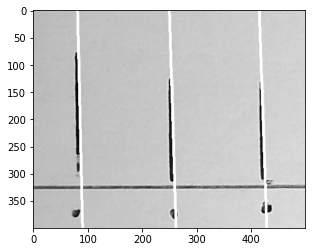

In [1]:
# Distacia linhas
import cv2
import numpy as np
from libs.line_detector_all import LineDetectorAll
from libs import Rectangle, Scene
from libs import draw_rectangle_1, draw_line_1
from IPython.display import display, clear_output, Image
import time
import matplotlib.pyplot as plt
%matplotlib inline

for num_img in range(12):
    num_img += 1
    path = f"media/imagens_medicao/img ({num_img}).png"
    img = cv2.imread(path)
    img_gray = img[400:800, 350:850].copy()
    img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.bilateralFilter(img_gray, 5, 20, 20)

    sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=9)

    opening = np.sqrt(sobel_y**2)
    opening = (np.mean(opening, axis = 0)) - np.min(np.mean(opening, axis = 0))

    rois = []
    n_cont = 0
    save_it = 0
    pause_cont = 0

    for i in opening:
        if i > np.mean(opening):
            if pause_cont <= 0:
                save_it = 1

        if save_it:
            rois.append(n_cont)
            pause_cont = 100
            save_it = 0

        n_cont += 1
        pause_cont -= 1


    rect_1 = Rectangle(x = rois[0]-20, y = int(img_gray.shape[0]/4), rz = 0, w = 100, h = 100)
    rect_2 = Rectangle(x = rois[1]-20, y = int(img_gray.shape[0]/3), rz = 0, w = 100, h = 100)
    rect_3 = Rectangle(x = rois[2]-20, y = int(img_gray.shape[0]/3), rz = 0, w = 100, h = 100)

    roi_1 = rect_1.crop_from_img(img_gray)
    roi_2 = rect_2.crop_from_img(img_gray)
    roi_3 = rect_3.crop_from_img(img_gray)

    l_Detector_1  = LineDetectorAll(9, True, False, True)
    l_Detector_2  = LineDetectorAll(9, True, False, True)
    l_Detector_3  = LineDetectorAll(9, True, False, True)

    line_1 = l_Detector_1.detect(roi_1)
    line_2 = l_Detector_2.detect(roi_2)
    line_3 = l_Detector_3.detect(roi_3)

    # Scenes
    scene_1 = Scene()
    scene_1.add(rect_1, "rect_1", None)
    scene_1.add(rect_2, "rect_2", None)
    scene_1.add(rect_3, "rect_3", None)
    scene_1.add(line_1, "line_1", "rect_1")
    scene_1.add(line_2, "line_2", "rect_2")
    scene_1.add(line_3, "line_3", "rect_3")

    # Global lines
    line_1_global = scene_1.get_global("line_1")
    line_2_global = scene_1.get_global("line_2")
    line_3_global = scene_1.get_global("line_3")

    img_lines = img_gray.copy()
    draw_line_1(img_lines, line_1_global, color=255, linewidth=4, transparency=0.0)
    draw_line_1(img_lines, line_2_global, color=255, linewidth=4, transparency=0.0)
    draw_line_1(img_lines, line_3_global, color=255, linewidth=4, transparency=0.0)

    print(f"Image {num_img}")
    print("Line 1-2 distance:\t", line_2_global[0] - line_1_global[0])
    print("Line 2-3 distance:\t", line_3_global[0] - line_2_global[0], "\n")

    plt.imshow(img_lines, cmap = 'gray');
    time.sleep(1)


In [4]:
# Libraries
import cv2
import numpy as np
from libs.line_detector_all import LineDetectorAll
from libs import Rectangle, Scene
from libs import draw_rectangle_1, draw_line_1
from IPython.display import display, clear_output, Image
import time
import matplotlib.pyplot as plt
%matplotlib inline

def import_Image(path):
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return(img_gray)

# Distância entre garras
def draw_lines(color: int = 0, path: str = 'media/teste.jpg'):
    # Image importing
    img_gray = import_Image(path)
    img_lines = img_gray.copy()
    kernel_size = 9

    # Regions of interest
    rect_top = Rectangle(x = 0, y = 0, rz = 0, w = img_gray.shape[1], h = img_gray.shape[0]/2)
    rect_bottom = Rectangle(x = 0, y = img_gray.shape[0]/2, rz = 0, w = img_gray.shape[1], h = img_gray.shape[0])
    
    roi_top = rect_top.crop_from_img(img_gray)
    roi_bottom = rect_bottom.crop_from_img(img_gray)

    # Lines
    l_Detector_top  = LineDetectorAll(kernel_size, True, False)
    l_Detector_bottom = LineDetectorAll(kernel_size, False, False)

    line_top = l_Detector_top.detect(roi_top)
    line_bottom = l_Detector_bottom.detect(roi_bottom)

    # Scenes
    scene_1 = Scene()
    scene_1.add(rect_top, "rect_top", None)
    scene_1.add(rect_bottom, "rect_bottom", None)
    scene_1.add(line_top, "line_top", "rect_top")
    scene_1.add(line_bottom, "line_bottom", "rect_bottom")

    # Global lines
    line_top_global = scene_1.get_global("line_top")
    line_bottom_global = scene_1.get_global("line_bottom")

    draw_line_1(img_lines, line_top_global, color=color, linewidth=4, transparency=0.0)
    draw_line_1(img_lines, line_bottom_global, color=color, linewidth=4, transparency=0.0)
    
    # Vertical line - visualization 
    cv2.line(img_lines, (int(line_top_global[0]), int(line_top_global[1])), (int(line_bottom_global[0]), int(line_bottom_global[1])), color, 4) 
    
    # Distance plot
    distance_text = f"Distance: {line_bottom_global[1] - line_top_global[1]:.2f}"
    cv2.putText(img_lines, distance_text, (int(line_bottom_global[0]), int(line_bottom_global[1]) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)


    # Visualization
    img_path = 'result_image.png'
    cv2.imwrite(img_path, img_lines) 

    display(Image(filename=img_path))

    def calculate_distance(color: int = 0, path: str = 'media/teste.jpg'):
        # Image importing
        img_gray = import_Image(path)
        img_lines = img_gray.copy()
        kernel_size = 9

        # Regions of interest
        rect_top = Rectangle(x = 0, y = 0, rz = 0, w = img_gray.shape[1], h = img_gray.shape[0]/2)
        rect_bottom = Rectangle(x = 0, y = img_gray.shape[0]/2, rz = 0, w = img_gray.shape[1], h = img_gray.shape[0])
        
        roi_top = rect_top.crop_from_img(img_gray)
        roi_bottom = rect_bottom.crop_from_img(img_gray)

        # Lines
        l_Detector_top  = LineDetectorAll(kernel_size, True, False)
        l_Detector_bottom = LineDetectorAll(kernel_size, False, False)

        line_top = l_Detector_top.detect(roi_top)
        line_bottom = l_Detector_bottom.detect(roi_bottom)

        # Scenes
        scene_1 = Scene()
        scene_1.add(rect_top, "rect_top", None)
        scene_1.add(rect_bottom, "rect_bottom", None)
        scene_1.add(line_top, "line_top", "rect_top")
        scene_1.add(line_bottom, "line_bottom", "rect_bottom")

        # Global lines
        line_top_global = scene_1.get_global("line_top")
        line_bottom_global = scene_1.get_global("line_bottom")

        draw_line_1(img_lines, line_top_global, color=color, linewidth=4, transparency=0.0)
        draw_line_1(img_lines, line_bottom_global, color=color, linewidth=4, transparency=0.0)
        
        # Vertical line - visualization 
        cv2.line(img_lines, (int(line_top_global[0]), int(line_top_global[1])), (int(line_bottom_global[0]), int(line_bottom_global[1])), color, 4) 
        
        # Distance plot
        distance_text = f"Distance: {line_bottom_global[1] - line_top_global[1]:.2f}"
        cv2.putText(img_lines, distance_text, (int(line_bottom_global[0]), int(line_bottom_global[1]) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)


        # Visualization
        img_path = 'result_image.png'
        cv2.imwrite(img_path, img_lines) 

        display(Image(filename=img_path))

    # Várias Rois pequenas
    # Diplib

    # # Values
    # print("Middle distance:\t", line_bottom_global[1] - line_top_global[1])
    # print("Line 1 angle:\t\t",  line_top_global[2])
    # print("Line 2 angle:\t\t",  line_bottom_global[2])


# def main():
#     cont = 40
#     while(cont < 210):
#         file = f'frame_{cont:04d}.png'

#         clear_output(wait=True)
#         draw_lines(color=255, path='media/' + file)
#         display(plt.gcf())
#         # time.sleep(1) 

#         cont += 3

# main()
    

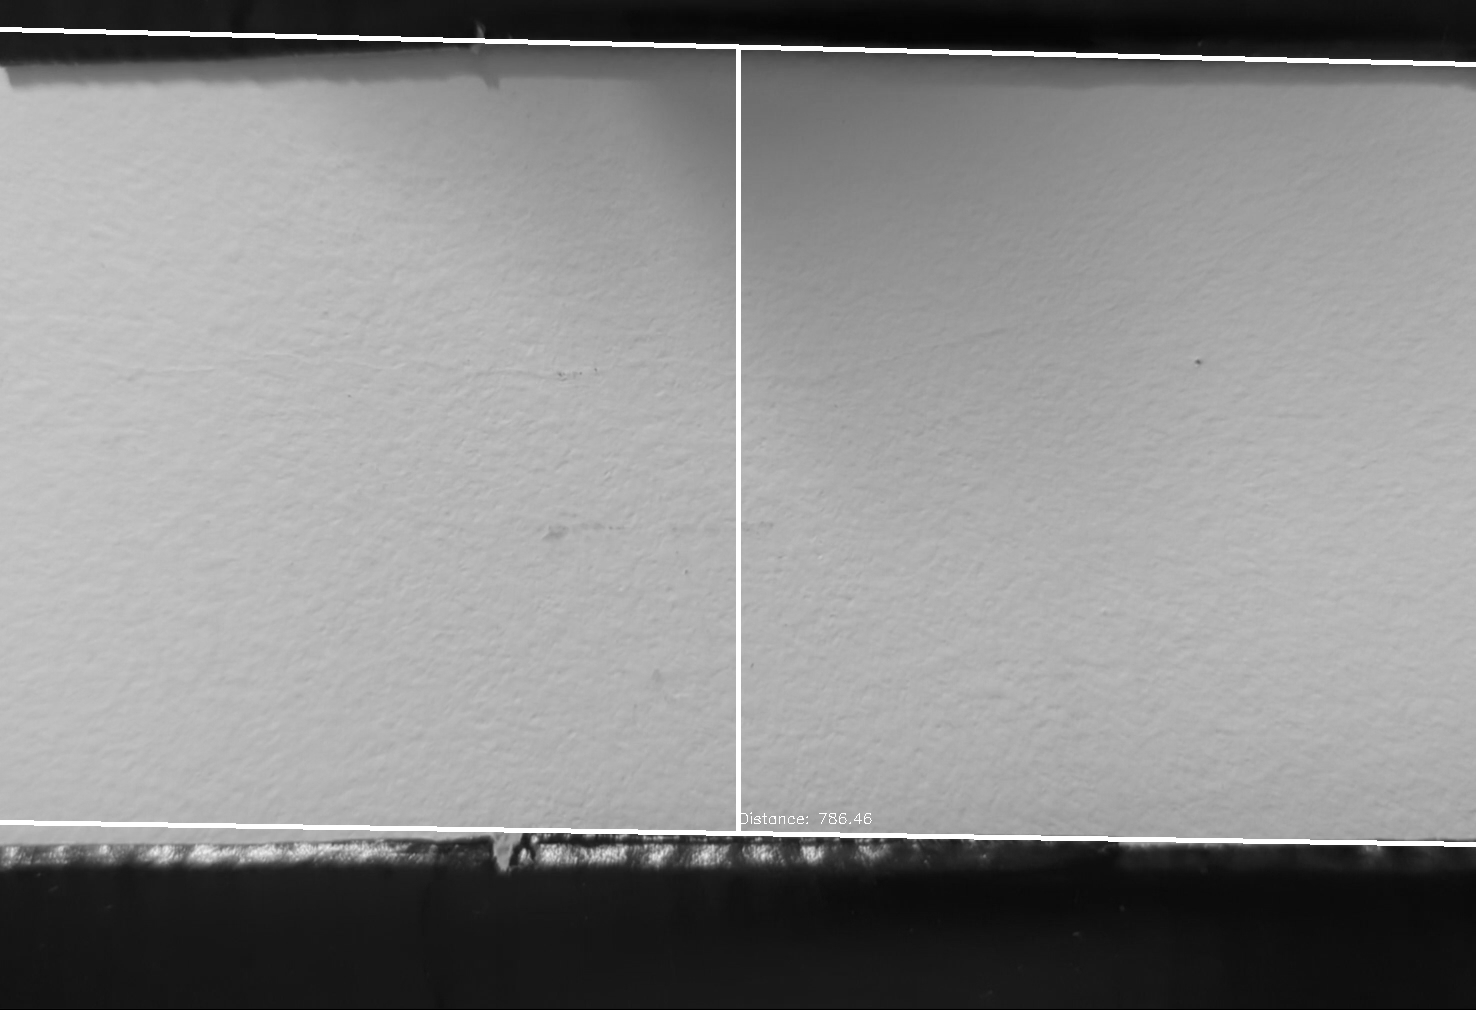

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
# Distância entre garras
def main():
    cont = 40
    while(cont < 190):
        file = f'frame_{cont:04d}.png'

        clear_output(wait=True)
        draw_lines(color=255, path='media/frames/' + file)
        display(plt.gcf())
        # time.sleep(1) 

        cont += 10

main()

In [ ]:
# Distância entre garras
def main():
    cont = 40
    while(cont < 210):
        file = f'frame_{cont:04d}.png'

        clear_output(wait=True)
        draw_lines(color=255, path='media/' + file)
        display(plt.gcf())
        # time.sleep(1) 

        cont += 10

main()